In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import sys
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
from IPython.display import Audio

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
Ravdess=r"D:\audio analysis\audio_speech_actors_01-24"
Crema=r"D:\audio analysis\AudioWAV"
Tess=r"D:\audio analysis\TESS Toronto emotional speech set data"
Savee=r"D:\audio analysis\ALL"

### ravdess

In [7]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for actor_dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.path.join(Ravdess,actor_dir)
    for file in os.listdir(actor):
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess , actor_dir , file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,D:\audio analysis\audio_speech_actors_01-24\Ac...
1,neutral,D:\audio analysis\audio_speech_actors_01-24\Ac...
2,neutral,D:\audio analysis\audio_speech_actors_01-24\Ac...
3,neutral,D:\audio analysis\audio_speech_actors_01-24\Ac...
4,calm,D:\audio analysis\audio_speech_actors_01-24\Ac...


In [8]:
crema_dir_list=os.listdir(Crema)
file_emotion=[]
file_path=[]
for file in crema_dir_list:
    filepath=os.path.join(Crema,file)
    file_path.append(filepath)
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,D:\audio analysis\AudioWAV\1001_DFA_ANG_XX.wav
1,disgust,D:\audio analysis\AudioWAV\1001_DFA_DIS_XX.wav
2,fear,D:\audio analysis\AudioWAV\1001_DFA_FEA_XX.wav
3,happy,D:\audio analysis\AudioWAV\1001_DFA_HAP_XX.wav
4,neutral,D:\audio analysis\AudioWAV\1001_DFA_NEU_XX.wav


In [9]:
tess_directory_list = os.listdir(Tess)



file_emotion = []
file_path = []

for emotion_dir in tess_directory_list:
    emotion_path = os.path.join(Tess, emotion_dir)
    files_in_emotion = os.listdir(emotion_path)
    
    for file in files_in_emotion:
        part = file.split('.')[0].split('_')
        
        if len(part) >= 3:  # Ensure there are enough parts in the split
            part = part[2]
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)    
            file_path.append(os.path.join(emotion_path, file))

# Create DataFrames for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,D:\audio analysis\TESS Toronto emotional speec...
1,angry,D:\audio analysis\TESS Toronto emotional speec...
2,angry,D:\audio analysis\TESS Toronto emotional speec...
3,angry,D:\audio analysis\TESS Toronto emotional speec...
4,angry,D:\audio analysis\TESS Toronto emotional speec...


In [10]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    current_file_path = os.path.join(Savee, file)
    
    if os.path.isfile(current_file_path):  # Check if it's a file
        file_path.append(current_file_path)
        part = file.split('_')[1]
        ele = part[:-6]
        
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')
    else:
        print(f"Ignoring '{current_file_path}' as it's not a file")   
                   
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.tail()

,Emotions,Path
475,surprise,D:\audio analysis\ALL\KL_su11.wav
476,surprise,D:\audio analysis\ALL\KL_su12.wav
477,surprise,D:\audio analysis\ALL\KL_su13.wav
478,surprise,D:\audio analysis\ALL\KL_su14.wav
479,surprise,D:\audio analysis\ALL\KL_su15.wav


#### Combining the data

In [11]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path['Path'] = data_path['Path'].apply(lambda x: x.replace('\\', '/'))
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,D:/audio analysis/audio_speech_actors_01-24/Ac...
1,neutral,D:/audio analysis/audio_speech_actors_01-24/Ac...
2,neutral,D:/audio analysis/audio_speech_actors_01-24/Ac...
3,neutral,D:/audio analysis/audio_speech_actors_01-24/Ac...
4,calm,D:/audio analysis/audio_speech_actors_01-24/Ac...


In [12]:
data_path.isna().sum()

Emotions    0
Path        0
dtype: int64

In [13]:
print(data_path['Emotions'].value_counts()['surprise'])

652


In [14]:
print(data_path.loc[data_path['Emotions']=='surprise'])

     Emotions                                               Path
52   surprise  D:/audio analysis/audio_speech_actors_01-24/Ac...
53   surprise  D:/audio analysis/audio_speech_actors_01-24/Ac...
54   surprise  D:/audio analysis/audio_speech_actors_01-24/Ac...
55   surprise  D:/audio analysis/audio_speech_actors_01-24/Ac...
56   surprise  D:/audio analysis/audio_speech_actors_01-24/Ac...
..        ...                                                ...
475  surprise                  D:/audio analysis/ALL/KL_su11.wav
476  surprise                  D:/audio analysis/ALL/KL_su12.wav
477  surprise                  D:/audio analysis/ALL/KL_su13.wav
478  surprise                  D:/audio analysis/ALL/KL_su14.wav
479  surprise                  D:/audio analysis/ALL/KL_su15.wav

[652 rows x 2 columns]


#### Visualisation

['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


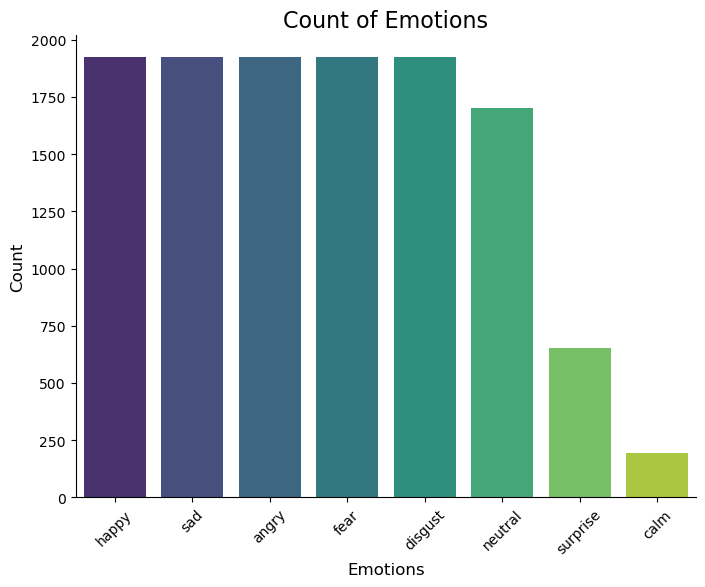

In [15]:
# Check the unique values in the 'Emotions' column to ensure they are strings representing emotions
print(data_path['Emotions'].unique())

# If the unique values look correct, and they are strings, you can force Seaborn to treat 'Emotions' as categorical:
plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions', palette='viridis', order=data_path['Emotions'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


In [16]:
print(data_path['Path'].where(data_path['Emotions']=='sad'))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
475    NaN
476    NaN
477    NaN
478    NaN
479    NaN
Name: Path, Length: 12162, dtype: object


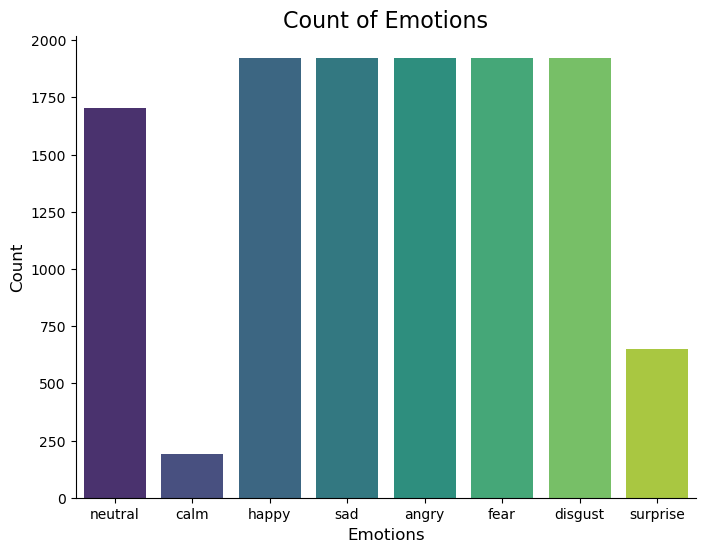

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named data_path
plt.figure(figsize=(8, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions', palette='viridis')  # Adding palette for color variation (optional)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [18]:
def waveplot(data,sampling,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sampling_rate, color="blue") #replace waveplot by waveshow and add additional argument color
    plt.show()

In [31]:
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(np.abs(x))#encountered warning
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr,x_axis='time', y_axis= 'hz')
    plt.colorbar()

In [26]:
emotion = 'surprise'  # Target emotion
filtered_paths = data_path['Path'][data_path['Emotions'] == emotion]

if not filtered_paths.empty:
    paths = filtered_paths.iloc[0]  # Retrieve the first path for 'emotion'
    print("Path :", paths)
else:
    print("No paths found for  emotion in the dataset.")


Path : D:/audio analysis/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav


In [27]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sampling_rate = librosa.load(path)
print(data,'\n',sampling_rate)

[-2.6555711e-06 -1.2237584e-05 -9.1077754e-07 ... -1.0303405e-09
  1.6803573e-09 -2.1517024e-09] 
 22050


In [28]:
data,sample_rate=librosa.load(paths)
print(data,'\n',sample_rate)

[ 2.0952140e-08 -2.8945083e-08  3.4449108e-08 ... -3.3717383e-14
  2.6456596e-13  4.5328880e-14] 
 22050


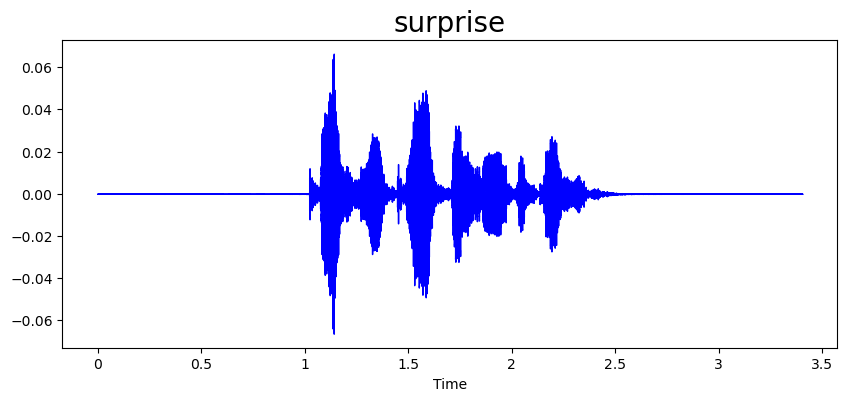

In [29]:
waveplot(data,sample_rate,emotion)

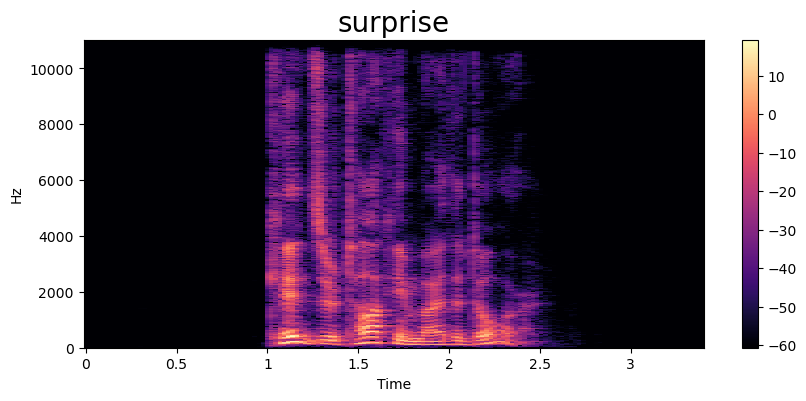

In [30]:
spectogram(data,sample_rate,emotion)

In [32]:
Audio(paths)

In [33]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [34]:
extract_mfcc(paths)

array([-6.3282214e+02,  6.1794079e+01, -5.8267647e-01,  9.6178389e+00,
        5.2318954e+00, -3.1074872e+00, -6.9680333e+00, -7.6794157e+00,
       -1.1350558e+01, -7.0204496e+00, -3.0548799e-01, -6.1307678e+00,
       -1.0003411e+00, -5.7197647e+00, -5.2665563e+00,  8.3916292e-02,
       -9.7242165e+00, -4.4694519e+00, -3.1505075e+00, -3.5455668e+00,
       -6.5561967e+00, -3.4341891e+00, -5.2708826e+00, -6.6345806e+00,
       -2.6908457e+00, -2.0647597e+00, -6.5634561e+00, -5.2534246e-01,
       -4.6596379e+00, -2.2137809e+00, -3.8918166e+00, -4.1215215e+00,
       -1.1622300e+00, -1.9549356e+00, -2.7381983e+00,  4.7001451e-01,
        2.8964028e-01,  2.4959365e-01, -2.4298170e+00, -1.7815094e+00],
      dtype=float32)

In [35]:
X_mfcc = data_path['Path'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

0      [-670.19543, 65.06385, 0.88895434, 14.715979, ...
1      [-660.23035, 63.325817, -2.6304574, 17.983355,...
2      [-661.9645, 66.65587, -0.9321578, 14.899042, 5...
3      [-657.72235, 65.03519, 3.1486723, 15.666511, 7...
4      [-694.5796, 72.531715, 3.1045616, 17.112118, 9...
                             ...                        
475    [-555.8243, 117.21683, 26.249662, 47.466187, 8...
476    [-529.016, 131.75406, 25.293447, 39.81962, 14....
477    [-570.3269, 129.49158, 37.857147, 28.908358, 1...
478    [-531.93134, 113.948814, 19.89846, 24.734169, ...
479    [-541.2516, 127.30222, 26.700256, 28.051023, -...
Name: Path, Length: 12162, dtype: object

In [49]:
X.shape
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(12162, 40)

In [50]:
X=np.expand_dims(X,-1)#Input shape accepted by LSTM Model
X.shape

(12162, 40, 1)

from keras.utils import to_categorical
y=to_categorical(data_path['Emotions'])
y.shape#Issue with converting string to int alternate code written below

In [41]:
from sklearn.preprocessing import LabelEncoder

# Assuming data_path['Emotions'] contains your emotion labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data_path['Emotions'])

# Now, you can use to_categorical on the encoded labels
from keras.utils import to_categorical
y = to_categorical(encoded_labels)
print(y.shape)


(12162, 8)


In [47]:
print(y)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [39]:
data_path['Emotions']

0       neutral
1       neutral
2       neutral
3       neutral
4          calm
         ...   
475    surprise
476    surprise
477    surprise
478    surprise
479    surprise
Name: Emotions, Length: 12162, dtype: object

#### Model Creation

#### You can create using LSTM Or CNN 1 D

#### LSTM Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)



In [63]:
model=Sequential([
    LSTM(512,return_sequences=False,input_shape=(40,1)),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(8,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 512)               1052672   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [65]:
model.save_weights('model2.h5')

In [66]:
checkpoint = ModelCheckpoint("model2.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [67]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, callbacks=[early_stopping], shuffle=True)


Epoch 1/30
267/267 [==============================] - 35s 121ms/step - loss: 1.9835 - accuracy: 0.1649 - val_loss: 1.9560 - val_accuracy: 0.1661
Epoch 2/30
267/267 [==============================] - 32s 119ms/step - loss: 1.9194 - accuracy: 0.1939 - val_loss: 1.8379 - val_accuracy: 0.2699
Epoch 3/30
267/267 [==============================] - 32s 121ms/step - loss: 1.8085 - accuracy: 0.2563 - val_loss: 1.6972 - val_accuracy: 0.3217
Epoch 4/30
267/267 [==============================] - 32s 119ms/step - loss: 1.6332 - accuracy: 0.3370 - val_loss: 1.5832 - val_accuracy: 0.3593
Epoch 5/30
267/267 [==============================] - 32s 119ms/step - loss: 1.5544 - accuracy: 0.3740 - val_loss: 1.4828 - val_accuracy: 0.4039
Epoch 6/30
267/267 [==============================] - 31s 117ms/step - loss: 1.5020 - accuracy: 0.3926 - val_loss: 1.4478 - val_accuracy: 0.4116
Epoch 7/30
267/267 [==============================] - 31s 117ms/step - loss: 1.4618 - accuracy: 0.4047 - val_loss: 1.4733 - val_ac

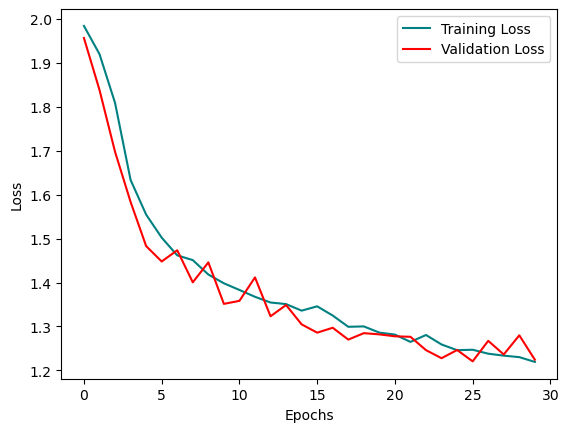

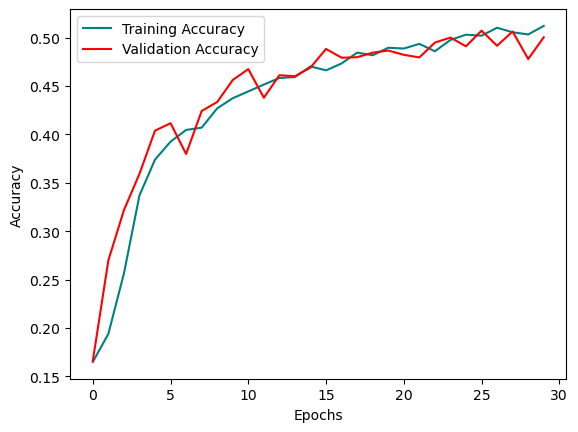

In [69]:
# Plot training and validation loss
plt.plot(history.history['loss'],color='teal',label='Training Loss')
plt.plot(history.history['val_loss'], color='red',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'],color='teal', label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','audio.h5'))

In [73]:
model=load_model(r"C:\Users\PRATHAMESH MANDIYE\NullClass SER\models\audio.h5")

In [ ]:
librosa.effects.time_stretch??

In [ ]:
librosa.effects.pitch_shift??